# 0. Homework5 - Evan Varan lze4

## 0.a Imports

In [534]:
import sys
import scipy as sp
import numpy as np
import matplotlib as mpl
from scipy.fftpack import fft, fftfreq

# We're going to get the windows from the "signal" library of SciPy
from scipy import signal
import random

import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('classic')

## 0.b Check Versions, etc

In [535]:
print('Python: \t{:2d}.{:1d}'
      .format(sys.version_info[0], sys.version_info[1]))
print('Matplot:\t',mpl.__version__)
print('Numpy:  \t',np.__version__)
print('SciPy:  \t',sp.__version__)

Python: 	 3.12
Matplot:	 3.8.2
Numpy:  	 1.26.3
SciPy:  	 1.12.0rc2


# 1. Set up sinusoids
This is exactly the same as the "Sinusoids" notebook

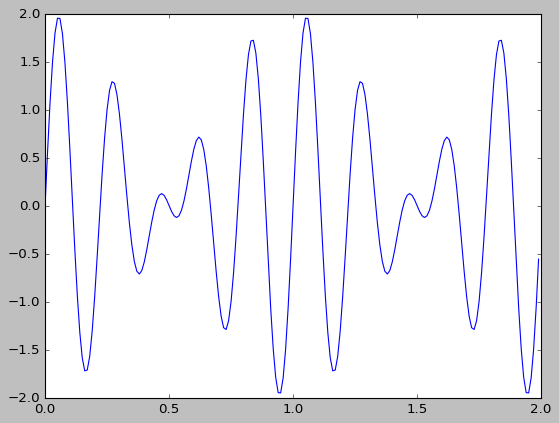

In [536]:
# Frequencies & Length
f1 = 5
f2 = 4
duration = 2.0

# Sampling Rate
Fs = 20 * max(f1,f2)
Ts = 1/Fs

# Time vector and Sinusoids
t = np.arange(0, duration, Ts)
s1 = np.sin(f1 * 2 * np.pi * t)
s2 = np.sin(f2 * 2 *np.pi * t)

# Add them up
s3 = s1 + s2

plt.plot(t,s3)
plt.show()

# 1.a Helper Functions

In [537]:
#Helper functions
def get_Spectrum(signal, NFFT, Ts):
    CFFT = fft(signal,NFFT) / len(signal)
    FF = fftfreq(NFFT,Ts)
    SS = 20.0 * np.log10(np.abs(CFFT))
    return FF, SS

def plot_window_function(window_type):
    #Window Calculations
    window_function = signal.windows.get_window(window_type, len(s3), True)
    s3w = s3 * window_function
    y = s3
    yw = s3w
    framepad = 4
    NFFT = 2 ** int(np.ceil(np.log2(np.abs(len(y)*framepad))))   
    F, Y = get_Spectrum(y, NFFT, Ts)
    FW, YW = get_Spectrum(yw, NFFT, Ts)
    
    #Energy calculations:
    windowed_energy = compute_energy(s3w)
    print(f"Windowed Signal Energy: {windowed_energy}")
    adjusted_signal = adjust_energy(s3,s3w)
    adjusted_energy = compute_energy(adjusted_signal)
    print(f"Adjusted Windowed Signal Energy: {adjusted_energy}")
    
    
    fig = plt.figure(figsize=(12,10))
    plt.suptitle('Windows', size='large')
    
    # Top plot - time domain
    ax1 = fig.add_subplot(2,1,1)
    ax1.plot(y, color='blue', label='Original', linewidth=1)
    ax1.plot(yw, color='red', label='Windowed', linewidth=1)
    ax1.plot(window_function, color='green', label='Window ('+window_type+')', linewidth=1, linestyle='--')
    
    ax1.set_title('Signal', fontsize='small')
    ax1.set_xlabel('Time (sec)', fontsize='small')
    ax1.set_ylabel('Amplitude', fontsize='small')
    ax1.set_ylim([1.1*min(y), 1.1*max(y)])
    ax1.legend()
    ax1.grid()
    
    # Bottom plot - frequency domain
    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(F[0:NFFT//2], Y[0:NFFT//2], color='blue', label='Original', linewidth=1)
    ax2.plot(FW[0:NFFT//2], YW[0:NFFT//2], color='red', label='Windowed ('+window_type+')', linewidth=1)
    
    ax2.set_title('Spectrum', fontsize='small')
    ax2.set_xlabel('Frequency (Hz)', fontsize='small')
    ax2.set_ylabel('Magnitude (dB)', fontsize='small')
    ax2.set_ylim([-100,10])
    ax2.legend()
    ax2.grid()
    
    plt.tight_layout()
    plt.show()
    
def compute_energy(signal):
    energy = np.sum(np.square(signal))
    return energy

def adjust_energy(original_signal, windowed_signal):
    orig_energy = compute_energy(original_signal)
    windowed_energy = compute_energy(windowed_signal)
    normalization_factor = np.sqrt(orig_energy / windowed_energy)
    adjusted_signal = windowed_signal * normalization_factor
    return adjusted_signal

# 2. Plotting Window Functions (Rectangular, Hanning, Hamming, Bartlett, Nuttall)
Energy is also being calculated through the helper functions but that will be reviewed in part 3.

Energy Calculations for rectangular: 
-------------------------------------
Original Signal Energy: 200.00000000000006
Windowed Signal Energy: 200.00000000000006
Adjusted Windowed Signal Energy: 200.00000000000006


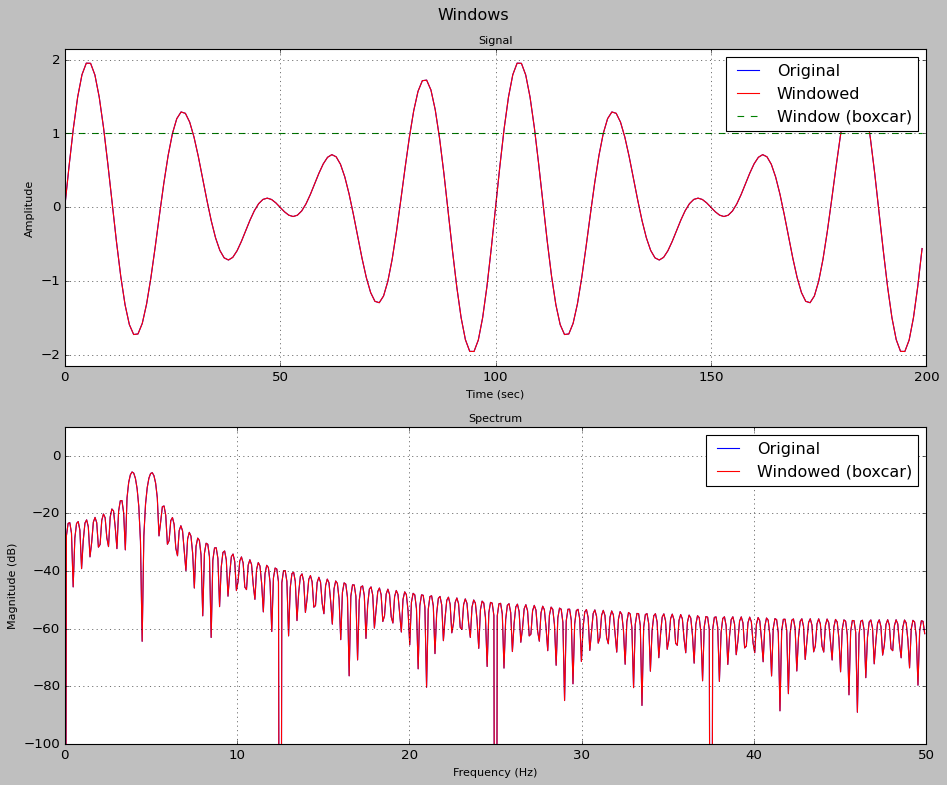

In [538]:
#Plotting Rectangular window
print("Energy Calculations for rectangular: ")
print("-------------------------------------")
original_energy = compute_energy(s3)
print(f"Original Signal Energy: {original_energy}")
plot_window_function("boxcar")

Energy Calculations for hanning: 
-------------------------------------
Original Signal Energy: 200.00000000000006
Windowed Signal Energy: 87.50000000000006
Adjusted Windowed Signal Energy: 200.00000000000006


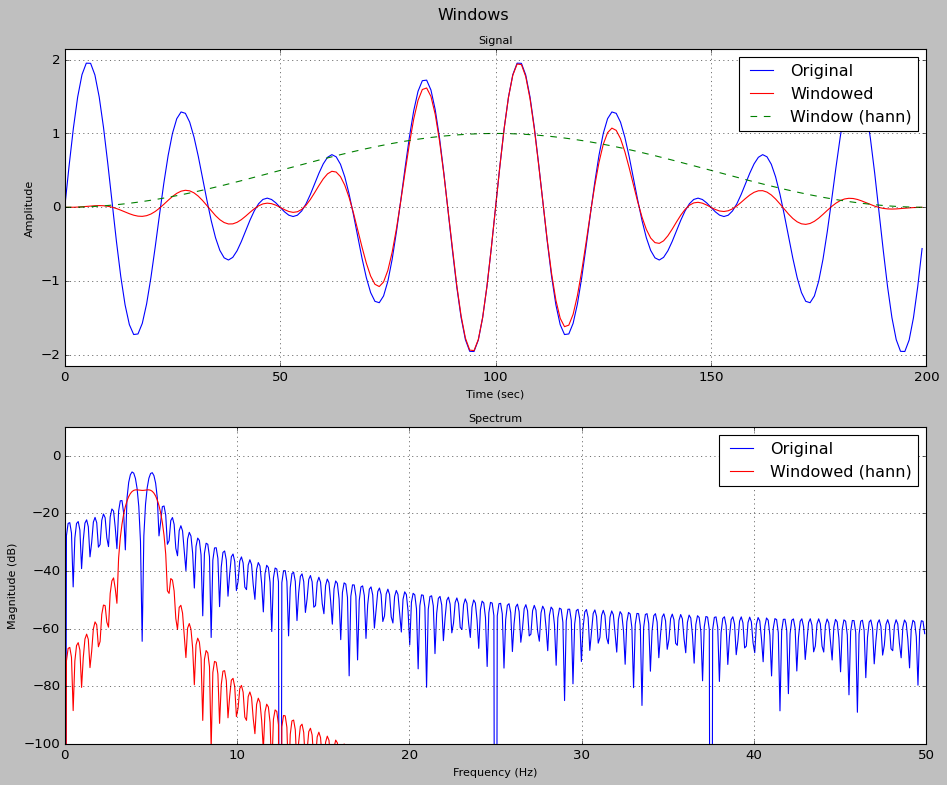

In [539]:
#Plotting Hanning window
print("Energy Calculations for hanning: ")
print("-------------------------------------")
print(f"Original Signal Energy: {original_energy}")
plot_window_function("hann")

Energy Calculations for hamming: 
-------------------------------------
Original Signal Energy: 200.00000000000006
Windowed Signal Energy: 90.06000000000006
Adjusted Windowed Signal Energy: 200.00000000000009


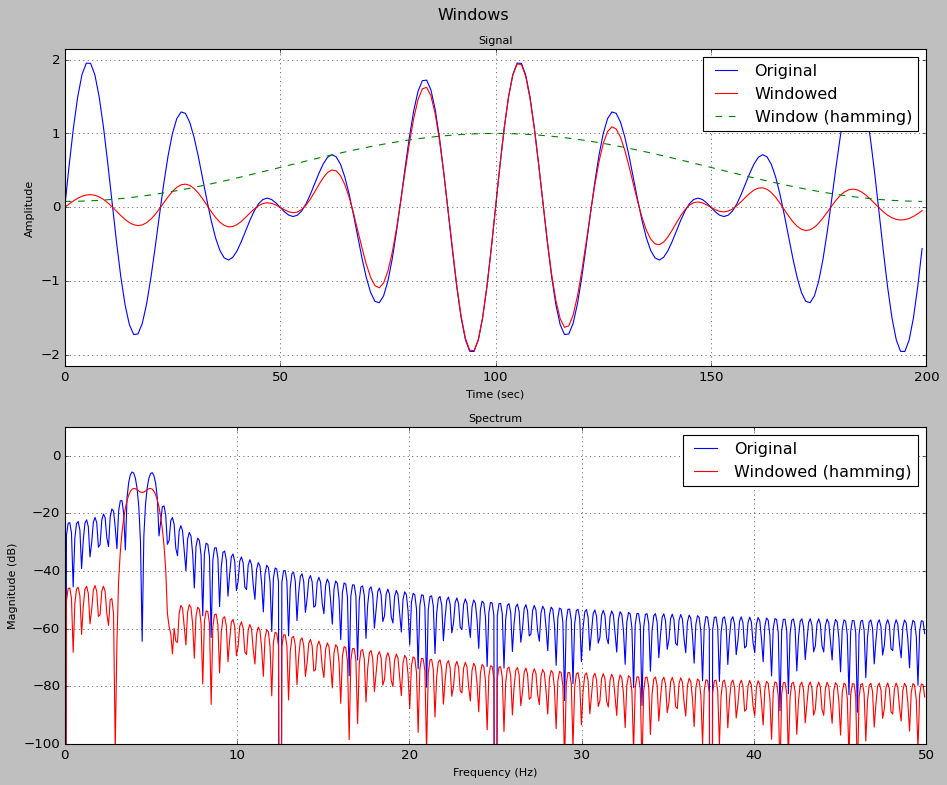

In [540]:
#Plotting Hamming window
print("Energy Calculations for hamming: ")
print("-------------------------------------")
print(f"Original Signal Energy: {original_energy}")
plot_window_function("hamming")

Energy Calculations for bartlett: 
-------------------------------------
Original Signal Energy: 200.00000000000006
Windowed Signal Energy: 76.54377137215573
Adjusted Windowed Signal Energy: 200.00000000000006


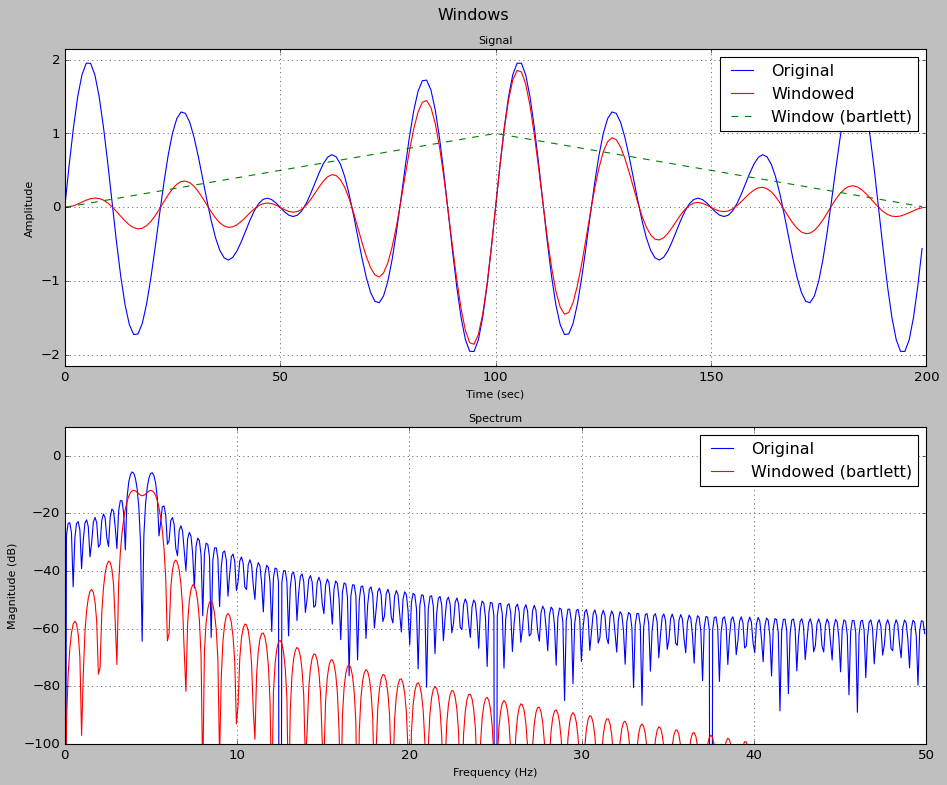

In [541]:
#Plotting Bartlett window
print("Energy Calculations for bartlett: ")
print("-------------------------------------")
print(f"Original Signal Energy: {original_energy}")
plot_window_function("bartlett")

Energy Calculations for nuttall: 
-------------------------------------
Original Signal Energy: 200.00000000000006
Windowed Signal Energy: 74.66337903774054
Adjusted Windowed Signal Energy: 200.00000000000006


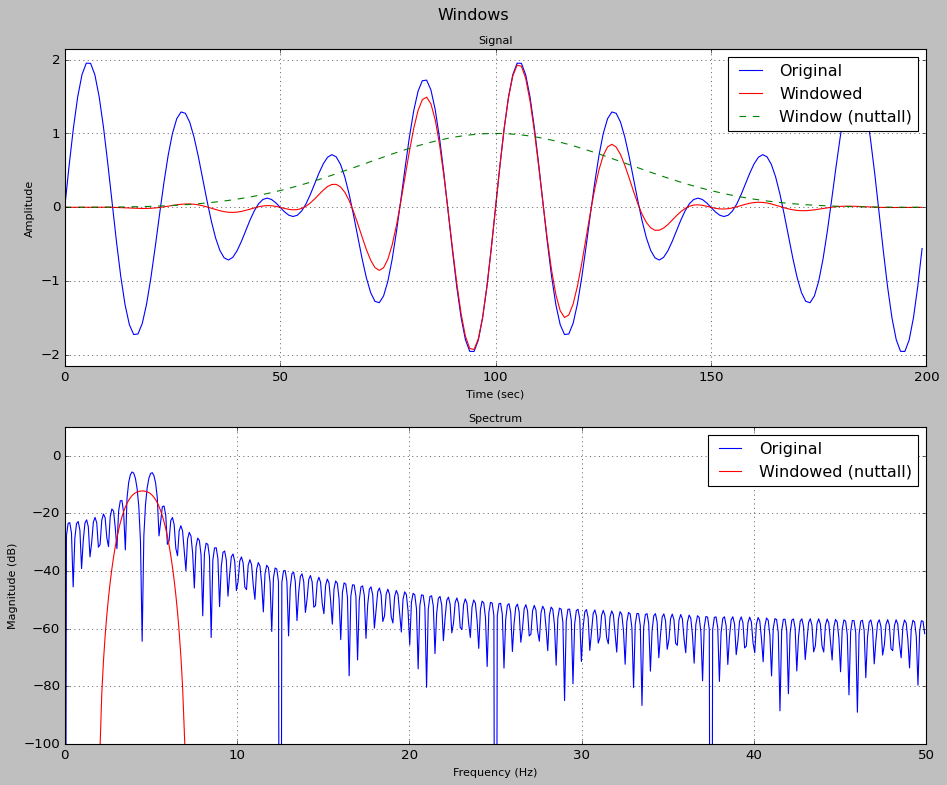

In [542]:
#Plotting Nuttall window
print("Energy Calculations for nuttall: ")
print("-------------------------------------")
print(f"Original Signal Energy: {original_energy}")
plot_window_function("nuttall")

# 2.a More Window Functions! (triangle, blackman)

Energy Calculations for triangle: 
-------------------------------------
Original Signal Energy: 200.00000000000006
Windowed Signal Energy: 77.01575470263282
Adjusted Windowed Signal Energy: 200.00000000000006


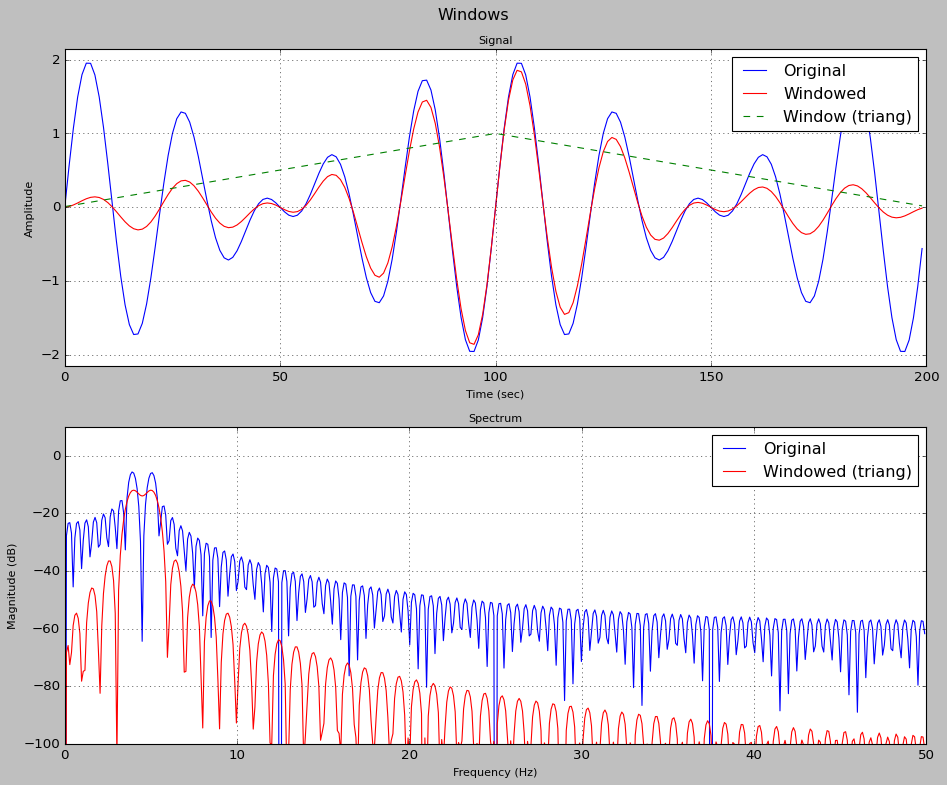

In [543]:
#Plotting Traingle window
print("Energy Calculations for triangle: ")
print("-------------------------------------")
print(f"Original Signal Energy: {original_energy}")
plot_window_function("triang")

Energy Calculations for blackman: 
-------------------------------------
Original Signal Energy: 200.00000000000006
Windowed Signal Energy: 80.14000000000004
Adjusted Windowed Signal Energy: 200.00000000000006


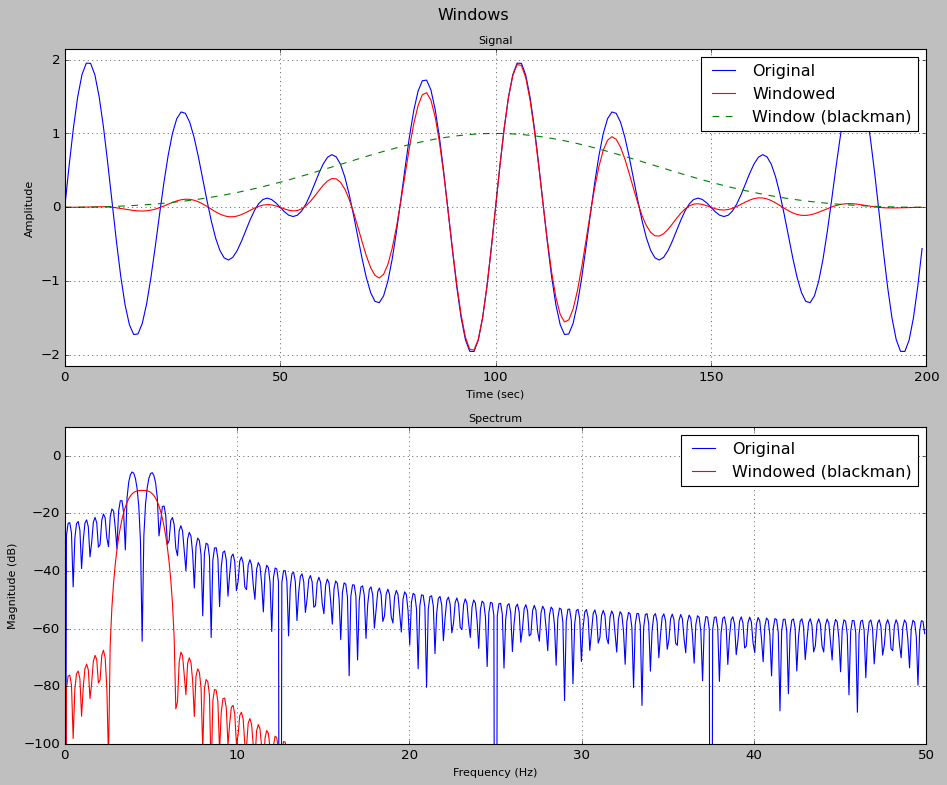

In [544]:
#Plotting Blackman window
print("Energy Calculations for blackman: ")
print("-------------------------------------")
print(f"Original Signal Energy: {original_energy}")
plot_window_function("blackman")

# 2.b Evan's Window Function
Creating our own window function

Windowed Signal Energy: 50.389884338167704
Adjusted Windowed Signal Energy: 200.00000000000006


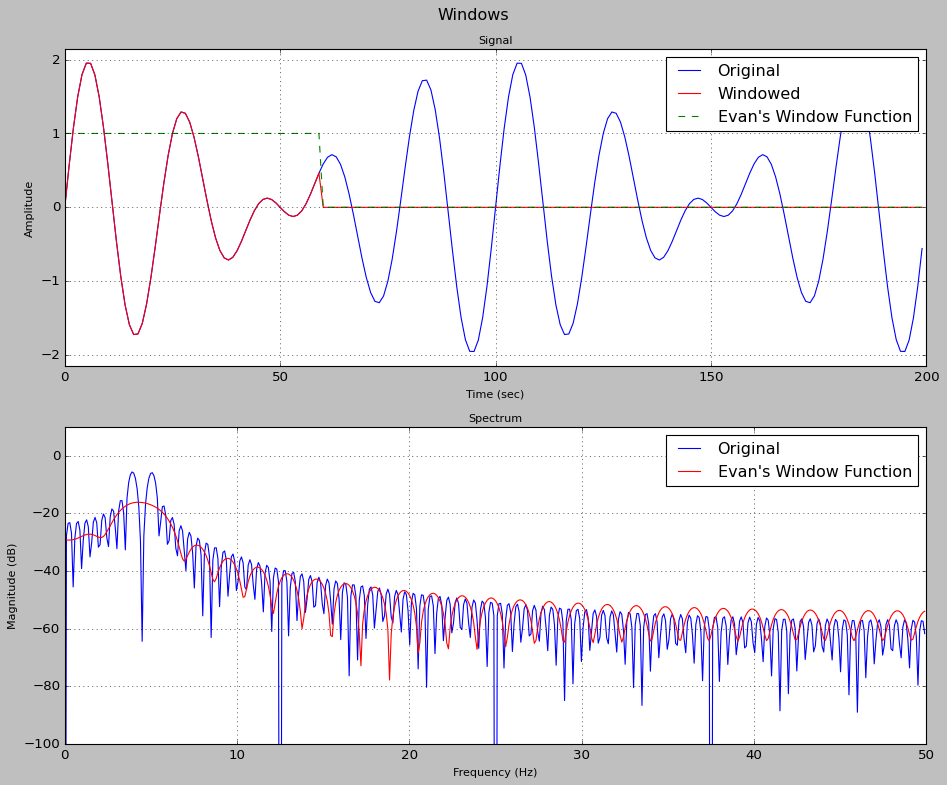

In [545]:
#Creating our own window, This function windows from 0 - 60.
window_length = 60
window = np.ones(window_length)
signal_length = len(s3)
zero_pad = signal_length - window_length
window = np.pad(window, (0, zero_pad), 'constant')
s3w = s3 * window

y = s3
yw = s3w
framepad = 4
NFFT = 2 ** int(np.ceil(np.log2(np.abs(len(y)*framepad))))   
F, Y = get_Spectrum(y, NFFT, Ts)
FW, YW = get_Spectrum(yw, NFFT, Ts)

#Energy calculations:
windowed_energy = compute_energy(s3w)
print(f"Windowed Signal Energy: {windowed_energy}")
adjusted_signal = adjust_energy(s3,s3w)
adjusted_energy = compute_energy(adjusted_signal)
print(f"Adjusted Windowed Signal Energy: {adjusted_energy}")


fig = plt.figure(figsize=(12,10))
plt.suptitle('Windows', size='large')

# Top plot - time domain
ax1 = fig.add_subplot(2,1,1)
ax1.plot(y, color='blue', label='Original', linewidth=1)
ax1.plot(yw, color='red', label='Windowed', linewidth=1)
ax1.plot(window, color='green', label="Evan's Window Function", linewidth=1, linestyle='--')

ax1.set_title('Signal', fontsize='small')
ax1.set_xlabel('Time (sec)', fontsize='small')
ax1.set_ylabel('Amplitude', fontsize='small')
ax1.set_ylim([1.1*min(y), 1.1*max(y)])
ax1.legend()
ax1.grid()

# Bottom plot - frequency domain
ax2 = fig.add_subplot(2,1,2)
ax2.plot(F[0:NFFT//2], Y[0:NFFT//2], color='blue', label='Original', linewidth=1)
ax2.plot(FW[0:NFFT//2], YW[0:NFFT//2], color='red', label="Evan's Window Function", linewidth=1)

ax2.set_title('Spectrum', fontsize='small')
ax2.set_xlabel('Frequency (Hz)', fontsize='small')
ax2.set_ylabel('Magnitude (dB)', fontsize='small')
ax2.set_ylim([-100,10])
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

# 3. Computing energy in signals

Previously in part 2, the energy of the original signal and the window signal was recorded. Note that most of the functions energy differs from original to window signal. 
This means we will have to adjust the energy in the signal after windowing by using a normalization factor. This will make the window signal match the un-windowed signal.
We can see through the output of part 2 that the signals energy has been properly adjusted.

# 3.a Affect of windowing on energy, spectral estimate, and other factors

1) Windowing a signal will always reduce its energy as shown above in part 2 and 3. This is due to the fact that windowed signals have a lower amplitude than the 
original signal.
2) With regards to spectral estimation, windowing allows us to reduce errors in the frequency domain analysis. Using a window cuts off the ends of the signal and allows us to
see the overall shape the signal clearer.
3) Another factor is the amplitude. Notice above that most window functions still maintain similar peak amplitudes. This is one way the orginal signal and the changed signal 
are alike.